In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

record_count += 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ocampo
Processing Record 2 of Set 1 | magpet
Processing Record 3 of Set 1 | asau
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | nichinan
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | camacha
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | biak
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | broome
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | livingstone
Processing Record 19 of Set 1 | gazanjyk
Processing Record 20 of Set 1 | nangomba
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | chanc

Processing Record 38 of Set 4 | warqla
City not found. Skipping...
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | akyab
Processing Record 41 of Set 4 | lugoba
Processing Record 42 of Set 4 | matamoros
Processing Record 43 of Set 4 | westport
Processing Record 44 of Set 4 | berlevag
Processing Record 45 of Set 4 | faya
Processing Record 46 of Set 4 | russell
Processing Record 47 of Set 4 | rensvik
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | la ronge
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | limbang
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | la orilla
Processing Record 7 of Set 5 | waverly
Processing Record 8 of Set 5 | kahului
Processing Record 9 of Set 5 | tsienyane
City not found. Skipping...

Processing Record 29 of Set 8 | havre-saint-pierre
Processing Record 30 of Set 8 | sawtell
Processing Record 31 of Set 8 | pontypool
Processing Record 32 of Set 8 | yambio
Processing Record 33 of Set 8 | pauini
Processing Record 34 of Set 8 | sungairaya
Processing Record 35 of Set 8 | santa barbara
Processing Record 36 of Set 8 | sao filipe
Processing Record 37 of Set 8 | tongzi
Processing Record 38 of Set 8 | cassilandia
Processing Record 39 of Set 8 | aykino
Processing Record 40 of Set 8 | ukiah
Processing Record 41 of Set 8 | roseburg
Processing Record 42 of Set 8 | tura
Processing Record 43 of Set 8 | kudahuvadhoo
Processing Record 44 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 45 of Set 8 | comodoro rivadavia
Processing Record 46 of Set 8 | valparaiso
Processing Record 47 of Set 8 | katsuura
Processing Record 48 of Set 8 | moron
Processing Record 49 of Set 8 | colborne
Processing Record 50 of Set 8 | san juan
Processing Record 1 of Set 9 | springbo

Processing Record 19 of Set 12 | bud
Processing Record 20 of Set 12 | alakurtti
Processing Record 21 of Set 12 | polis
Processing Record 22 of Set 12 | port hedland
Processing Record 23 of Set 12 | coahuayana
Processing Record 24 of Set 12 | nieuw nickerie
Processing Record 25 of Set 12 | carmen
Processing Record 26 of Set 12 | batemans bay
Processing Record 27 of Set 12 | batagay
Processing Record 28 of Set 12 | ouesso
Processing Record 29 of Set 12 | am timan
Processing Record 30 of Set 12 | saint anthony
Processing Record 31 of Set 12 | goderich
Processing Record 32 of Set 12 | misratah
Processing Record 33 of Set 12 | altay
Processing Record 34 of Set 12 | saint-leu
Processing Record 35 of Set 12 | praia da vitoria
Processing Record 36 of Set 12 | nuuk
Processing Record 37 of Set 12 | bannu
Processing Record 38 of Set 12 | safaga
Processing Record 39 of Set 12 | sakakah
Processing Record 40 of Set 12 | lebyazhye
Processing Record 41 of Set 12 | japura
Processing Record 42 of Set 12

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ocampo,21.6500,-101.5000,72.28,37,98,3.67,MX,2021-06-06 16:01:10
1,Magpet,7.1119,125.1133,73.80,86,100,0.43,PH,2021-06-06 16:01:10
2,Asau,46.4333,26.4000,69.28,48,12,1.66,RO,2021-06-06 16:01:10
3,Tiksi,71.6872,128.8694,42.12,69,85,8.25,RU,2021-06-06 16:01:11
4,Nichinan,31.6000,131.3667,67.15,90,100,2.91,JP,2021-06-06 16:01:11
5,Hobart,-42.8794,147.3294,52.27,87,75,1.99,AU,2021-06-06 16:00:23
6,Mataura,-46.1927,168.8643,44.06,86,99,2.08,NZ,2021-06-06 16:00:52
7,Rikitea,-23.1203,-134.9692,76.44,82,97,14.70,PF,2021-06-06 16:01:12
8,Tuatapere,-46.1333,167.6833,42.46,86,57,3.42,NZ,2021-06-06 16:01:12
9,Albany,42.6001,-73.9662,88.92,48,56,1.01,US,2021-06-06 16:00:50


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [9]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ocampo,MX,2021-06-06 16:01:10,21.6500,-101.5000,72.28,37,98,3.67
1,Magpet,PH,2021-06-06 16:01:10,7.1119,125.1133,73.80,86,100,0.43
2,Asau,RO,2021-06-06 16:01:10,46.4333,26.4000,69.28,48,12,1.66
3,Tiksi,RU,2021-06-06 16:01:11,71.6872,128.8694,42.12,69,85,8.25
4,Nichinan,JP,2021-06-06 16:01:11,31.6000,131.3667,67.15,90,100,2.91
5,Hobart,AU,2021-06-06 16:00:23,-42.8794,147.3294,52.27,87,75,1.99
6,Mataura,NZ,2021-06-06 16:00:52,-46.1927,168.8643,44.06,86,99,2.08
7,Rikitea,PF,2021-06-06 16:01:12,-23.1203,-134.9692,76.44,82,97,14.70
8,Tuatapere,NZ,2021-06-06 16:01:12,-46.1333,167.6833,42.46,86,57,3.42
9,Albany,US,2021-06-06 16:00:50,42.6001,-73.9662,88.92,48,56,1.01


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

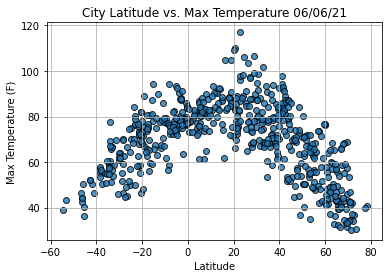

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

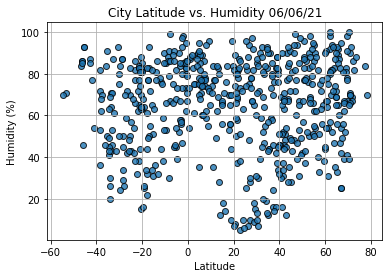

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

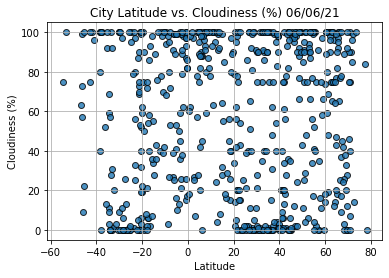

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

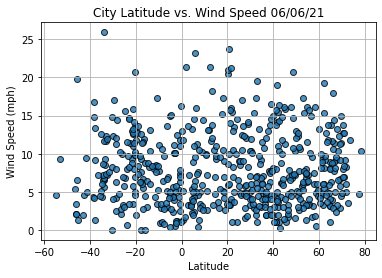

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ocampo,MX,2021-06-06 16:01:10,21.6500,-101.5000,72.28,37,98,3.67
1,Magpet,PH,2021-06-06 16:01:10,7.1119,125.1133,73.80,86,100,0.43
2,Asau,RO,2021-06-06 16:01:10,46.4333,26.4000,69.28,48,12,1.66
3,Tiksi,RU,2021-06-06 16:01:11,71.6872,128.8694,42.12,69,85,8.25
4,Nichinan,JP,2021-06-06 16:01:11,31.6000,131.3667,67.15,90,100,2.91


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

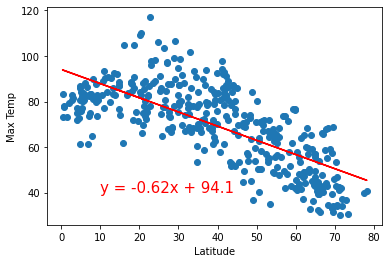

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

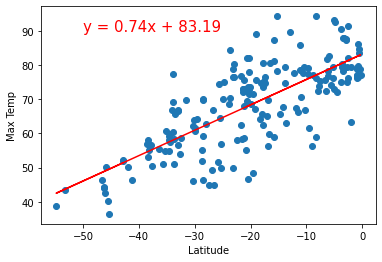

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

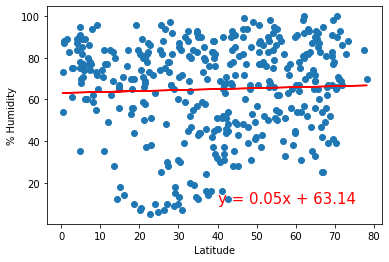

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

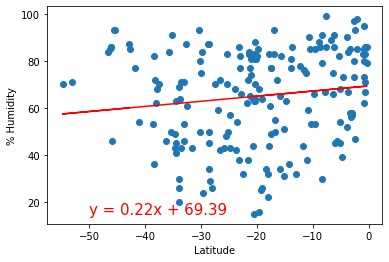

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n  for % Humidity', '% Humidity',(-50,15))

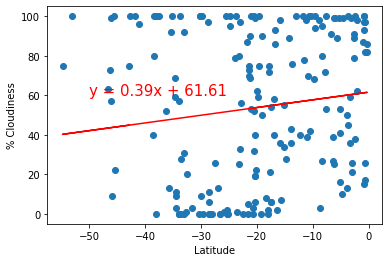

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n                        for % Cloudiness', '% Cloudiness',(-50,60))

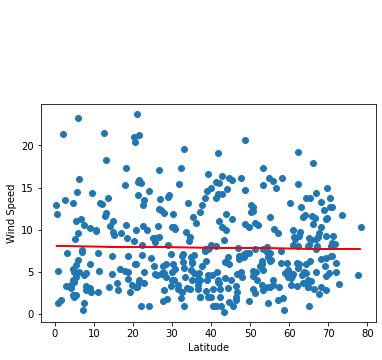

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n                        for Wind Speed', 'Wind Speed',(40,35))

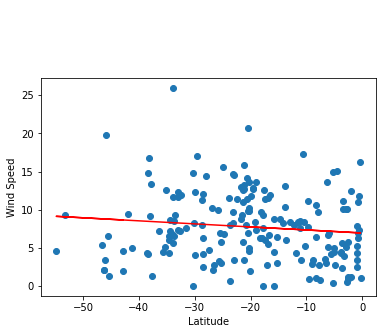

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: invalid syntax (<ipython-input-41-799863cadc6f>, line 1)